In [1]:
from plywood_gallery import ChapterConfig

#ChapterConfig.clean("Layer Options")
ChapterConfig.reset_counter()
ChapterConfig.set_chapter_name("Layer Options")

Plywood Gallery v0.0.9


/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_17539/2736954734.py:20: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  viewer.window.qt_viewer.dockLayerControls.toggleViewAction().trigger()
/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_17539/2736954734.py:21: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  viewer.window.qt_viewer.dockLayerList.toggleViewAction().trigger()


NapariSettings (defaults excluded)
----------------------------------
appearance:
  layer_tooltip_visibility: true
  theme: light
application:
  first_time: false
  save_window_geometry: false
  window_position:
  - 800
  - 300
  window_statusbar: false
plugins:
  disabled_plugins:
  - napari
  - napari-svg

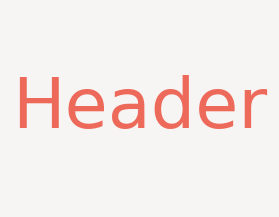

In [2]:
%%capture_png -p Header2.png --celltype Header --style "width:160px"
import matplotlib.pyplot as plt
import napari
import numpy as np
import scipy
from scipy import ndimage as ndi
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800, 300)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar = False
get_settings().application.save_window_state = False


viewer = napari.Viewer()
viewer.theme = "light"
viewer.dims.ndisplay = 3
viewer.window.resize(800, 600)
viewer.window.qt_viewer.dockLayerControls.toggleViewAction().trigger()
viewer.window.qt_viewer.dockLayerList.toggleViewAction().trigger()


def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash=False)
    plt.imshow(img)
    plt.axis("off")


# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs = blobs[200:, 200:, :-100]
blobs[:, :, :50] = 1

import matplotlib.pyplot as plt  # NOT

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} # NOT

fix, ax = plt.subplots(figsize=(5, 4), facecolor="#F7F5F3")  # NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A")  # NOT
ax.text(0.5, 0.5, "Header", **text_kwargs)  # NOT
ax.axis("off")
# NOT

from napari.settings import get_settings

get_settings()

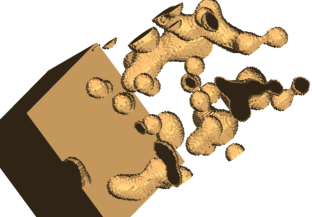

In [3]:
%%capture_png -p FirstView.png --celltype Normal --style "width:160px"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.03)
viewer.camera.angles = (30, 40, 80)
layer1.opacity = 1
make_screenshot(viewer)

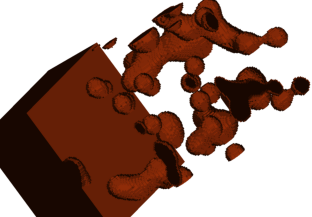

In [4]:
%%capture_png -p Random1.png --celltype Normal --style "width:160px"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.5)
viewer.camera.angles = (30, 40, 80)
layer1.opacity = 1
make_screenshot(viewer)

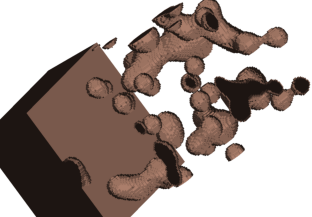

In [5]:
%%capture_png -p Random2.png --celltype Normal --style "width:160px"
layer1 = viewer.add_labels(blobs, name="layer1", seed=0.9)
viewer.camera.angles = (30, 40, 80)
layer1.opacity = 1
make_screenshot(viewer)

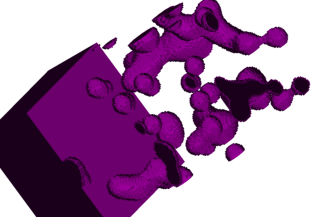

In [6]:
%%capture_png -p Random2.png --celltype Normal --style "width:160px"
my_red = {i: "purple" for i in range(1, 10)}  # currently slow!!
my_layer = viewer.add_labels(blobs, name="blobs", color=my_red)
my_layer.opacity = 1
make_screenshot(viewer)

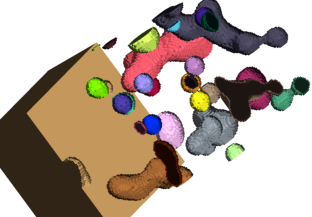

In [7]:
%%capture_png -p Labeled.png --celltype Normal --style "width:160px"
viewer.layers.clear()
labeled = ndi.label(blobs)[0]
layer1 = viewer.add_labels(labeled, name="layer2", seed=0.03)
viewer.camera.angles = (30, 40, 80)
layer1.opacity = 1
make_screenshot(viewer)

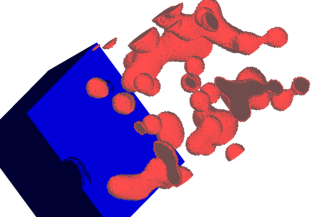

In [8]:
%%capture_png -p FindBiggest.png --celltype Normal --style "width:160px"
# label data
mylabel, feature_num = scipy.ndimage.label(blobs)
label_index, counts = np.unique(mylabel, return_counts=True)
# sort labels
labeled_dots = {}
for A, B in zip(label_index, counts):
    labeled_dots[A] = B
sorted_dict = dict(sorted(labeled_dots.items(), key=lambda item: item[1], reverse=True))
highest_count = list(sorted_dict.keys())[1]  # get highest label

viewer.layers.clear()
labeled, nums = ndi.label(blobs)
my_red = {i: "red" for i in range(1, nums + 1)}

layer1 = viewer.add_labels(labeled, name="blobs", color=my_red)

my_blue = {i: "blue" for i in range(1, nums + 1)}
mask = labeled == highest_count
layer1 = viewer.add_labels(mask, name="special_blob", color=my_blue)

viewer.camera.angles = (30, 40, 80)
layer1.opacity = 1
make_screenshot(viewer)